In [88]:
import pandas as pd 

data_address = "/Users/user/Desktop/Business_intelligence_in_Python/eBayAuctions.csv"
ebay_df = pd.read_csv(data_address,encoding='utf-8')


In [89]:
# explore the data 
ebay_df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [90]:
ebay_df.columns

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')

In [91]:
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
Category        1972 non-null object
currency        1972 non-null object
sellerRating    1972 non-null int64
Duration        1972 non-null int64
endDay          1972 non-null object
ClosePrice      1972 non-null float64
OpenPrice       1972 non-null float64
Competitive?    1972 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 123.3+ KB


In [92]:
# create the pivot table 
ebay_df.groupby('Category').mean()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
Category,,,,,
Antique/Art/Craft,2667.774011,6.971751,12.909040,6.069435,0.564972
Automotive,2865.421348,5.022472,93.018876,55.547978,0.353933
Books,1294.018519,7.481481,28.864074,7.850926,0.500000
Business/Industrial,2441.166667,6.055556,40.149444,13.973333,0.666667
Clothing/Accessories,1091.554622,7.478992,34.650168,7.736975,0.504202
Coins/Stamps,3637.513514,6.756757,31.088108,25.077297,0.297297
Collectibles,3040.046025,6.790795,36.872720,8.304435,0.577406
Computer,1144.722222,5.583333,83.776389,8.081944,0.666667
Electronics,1565.181818,6.818182,88.328364,17.115455,0.800000


In [93]:
ebay_df.groupby('Duration').mean()

,sellerRating,ClosePrice,OpenPrice,Competitive?
Duration,,,,
1,4712.217391,121.823043,12.565217,0.521739
3,3596.915493,44.220235,20.722488,0.450704
5,5797.652361,46.813605,13.563433,0.686695
7,2909.611169,29.362089,13.055646,0.489142
10,2082.396040,31.183102,6.080330,0.544554


In [94]:
ebay_df.groupby('endDay').mean()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
endDay,,,,,
Fri,3990.411150,5.902439,40.192648,18.517317,0.466899
Mon,6094.691606,6.133212,38.053723,8.209562,0.673358
Sat,2774.350427,6.068376,40.152108,17.035413,0.427350
Sun,2504.408284,6.437870,41.936657,17.595414,0.485207
Thu,1206.207921,6.990099,20.414802,5.566832,0.603960
Tue,2043.321637,7.730994,27.698713,12.659240,0.532164
Wed,1630.693333,9.280000,31.474933,6.151733,0.480000


In [95]:
# Create dummy variables for category 
category = pd.get_dummies(ebay_df['Category'],drop_first = True)
currency = pd.get_dummies(ebay_df['currency'],drop_first=True)
duration = pd.get_dummies(ebay_df['Duration'],drop_first= True)
endday   = pd.get_dummies(ebay_df['endDay'],drop_first= True)
#combine dummy columns to the dataset 
ebay_df = pd.concat([ebay_df,category,currency,duration,endday],axis=1)

In [96]:
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 37 columns):
Category                1972 non-null object
currency                1972 non-null object
sellerRating            1972 non-null int64
Duration                1972 non-null int64
endDay                  1972 non-null object
ClosePrice              1972 non-null float64
OpenPrice               1972 non-null float64
Competitive?            1972 non-null int64
Automotive              1972 non-null uint8
Books                   1972 non-null uint8
Business/Industrial     1972 non-null uint8
Clothing/Accessories    1972 non-null uint8
Coins/Stamps            1972 non-null uint8
Collectibles            1972 non-null uint8
Computer                1972 non-null uint8
Electronics             1972 non-null uint8
EverythingElse          1972 non-null uint8
Health/Beauty           1972 non-null uint8
Home/Garden             1972 non-null uint8
Jewelry                 1972 non-null uint8
Music/

In [97]:
# delete categorial variables 
ebay_with_dummies  = ebay_df.drop(columns=['Category','currency','endDay'])
ebay_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 34 columns):
sellerRating            1972 non-null int64
Duration                1972 non-null int64
ClosePrice              1972 non-null float64
OpenPrice               1972 non-null float64
Competitive?            1972 non-null int64
Automotive              1972 non-null uint8
Books                   1972 non-null uint8
Business/Industrial     1972 non-null uint8
Clothing/Accessories    1972 non-null uint8
Coins/Stamps            1972 non-null uint8
Collectibles            1972 non-null uint8
Computer                1972 non-null uint8
Electronics             1972 non-null uint8
EverythingElse          1972 non-null uint8
Health/Beauty           1972 non-null uint8
Home/Garden             1972 non-null uint8
Jewelry                 1972 non-null uint8
Music/Movie/Game        1972 non-null uint8
Photography             1972 non-null uint8
Pottery/Glass           1972 non-null uint8
SportingG

In [98]:
# split the train and test data 
# X_train: the predictors in the training set 
# X_test:  the predictors in the test set 
# y_train: the predicted value in the training set 
# y_test:  the predicted value in the test set  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ebay_with_dummies.drop('Competitive?',axis=1), 
                                                    ebay_with_dummies['Competitive?'], test_size=0.4, 
                                                    random_state=12345)

In [99]:
# run the logistics regression model 
from sklearn.linear_model import LogisticRegression
train_regl = LogisticRegression(solver='lbfgs')
train_regl.fit(X_train,y_train)
# this result shows us the result when cutoff = 0.5 
test_regl = train_regl.predict(X_test)   

In [102]:
# make thhe comparsion chart between prediction value and actual value 
result_df = pd.DataFrame({'predict':test_regl,'actual':y_test})

In [103]:
result_df.head()

,predict,actual
796,0,0
1002,0,0
1494,1,0
511,1,1
300,0,0


In [104]:
# generate the confusion matrix 
from sklearn import metrics
cmatrix = metrics.confusion_matrix(y_test,test_regl)
cmatrix

array([[295,  69],
       [120, 305]])

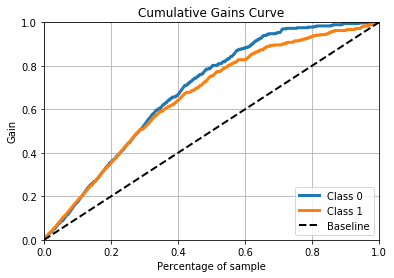

In [105]:
y_proba = train_regl.predict_proba(X_test)
# gain chart 
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,y_proba)


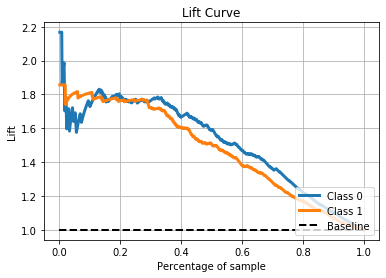

In [106]:
#lift chart 
skplt.metrics.plot_lift_curve(y_test, y_proba)

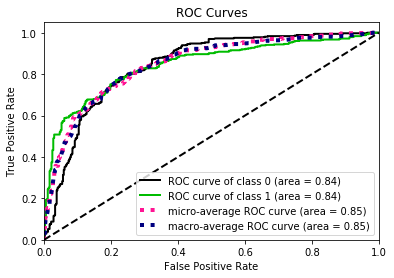

In [107]:
# ROC Chart 
skplt.metrics.plot_roc(y_test,y_proba)